In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

In [5]:
# Read the CSV file with ";" as the delimiter
df = pd.read_csv("/kaggle/input/bank-csv/bank.csv", delimiter=";")
# Remove double quotes from column names
df.columns = df.columns.str.replace('"', '')
# Remove double quotes from values
df = df.map(lambda x: x.replace('"', '') if isinstance(x, str) else x)

In [6]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


EDA



Categorical columns exploration



In the dataset we have both categorical and numerical columns. Let's look at the values of categorical columns first.

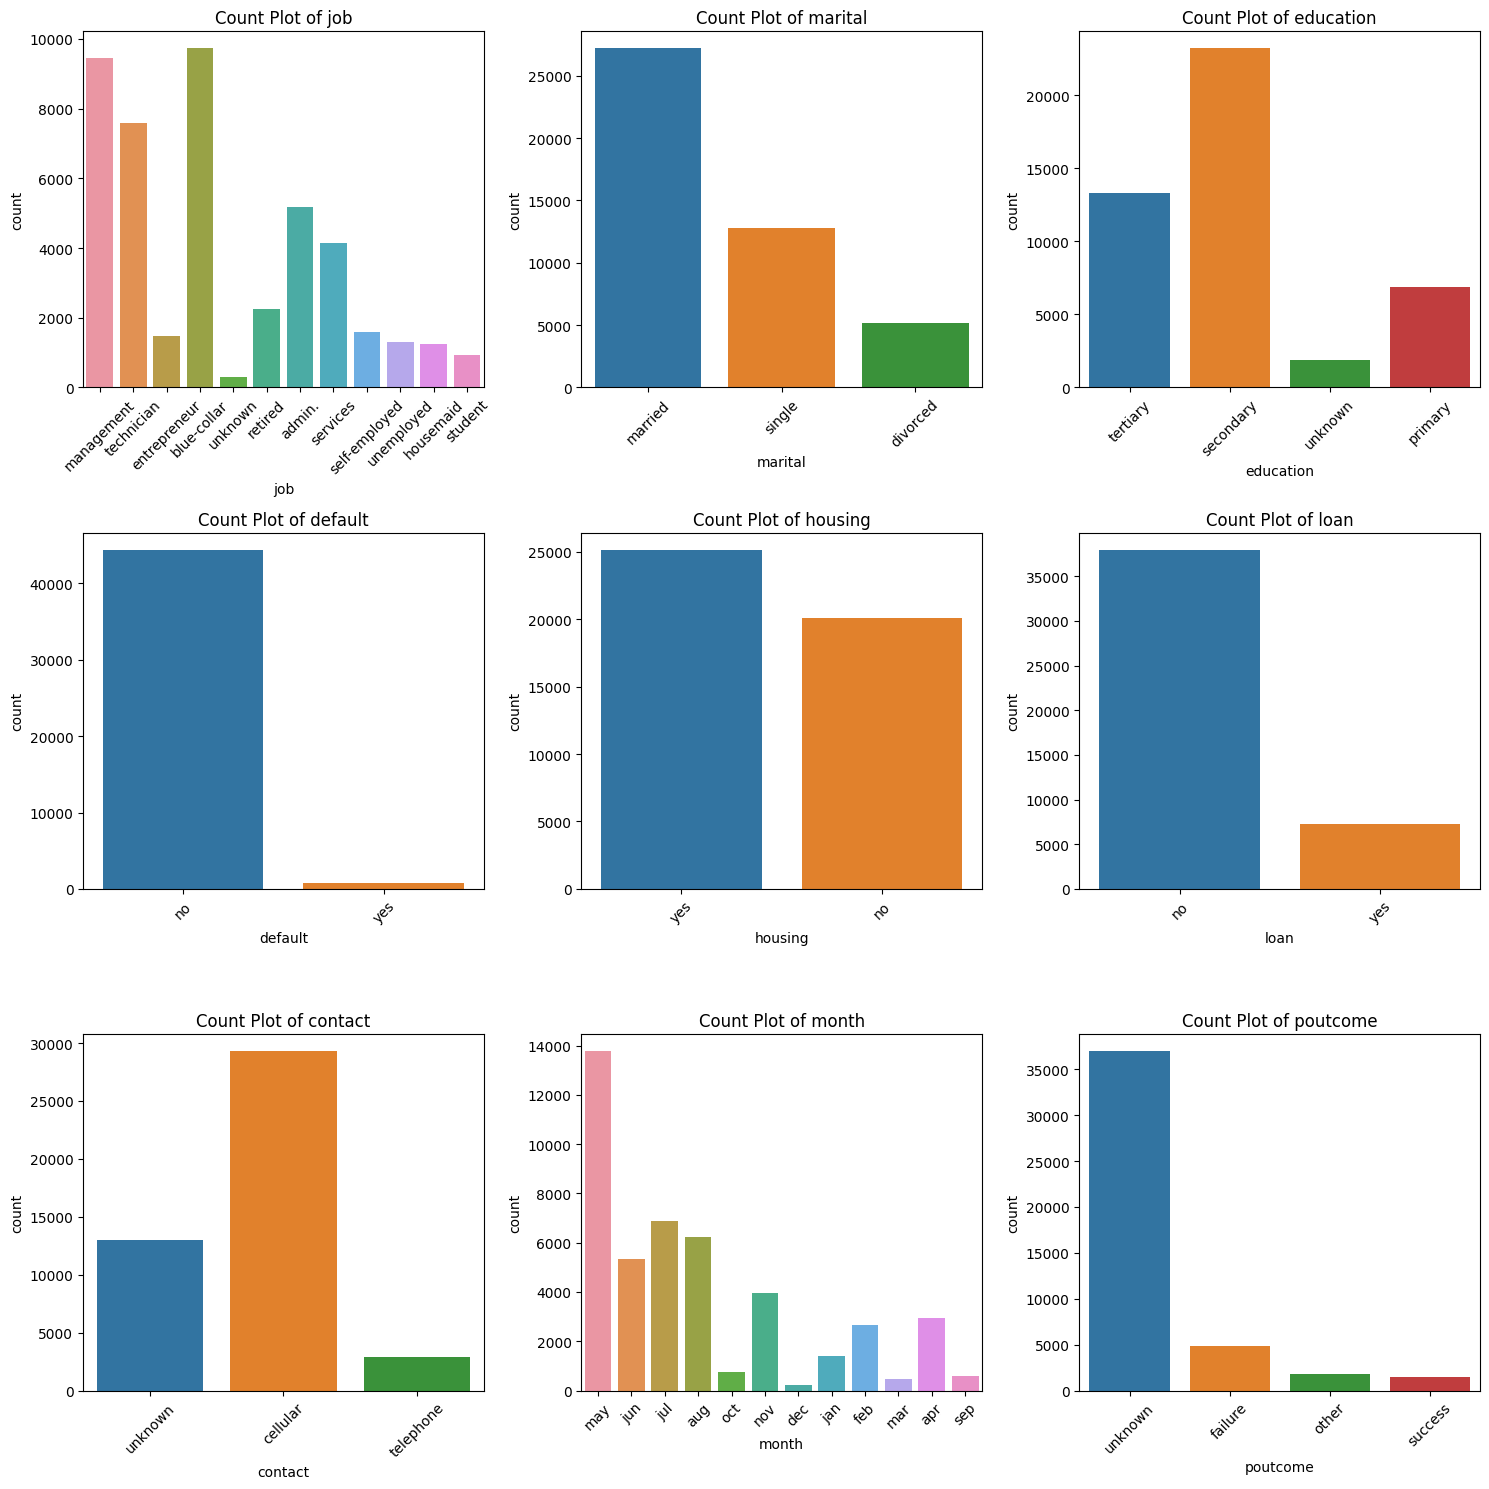

In [10]:
# Define categorical columns and set up the plot grid
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
fig, axes = plt.subplots((len(cat_columns) + 2) // 3, 3, figsize=(15, 15))

# Plot each column in a loop
for ax, col in zip(axes.flat, cat_columns):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes
for ax in axes.flat[len(cat_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Numerical columns exploration



Now let's look at the numerical columns' values. The most convenient way to look at the numerical values is plotting histograms.

/tmp/ipykernel_30/2945461511.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



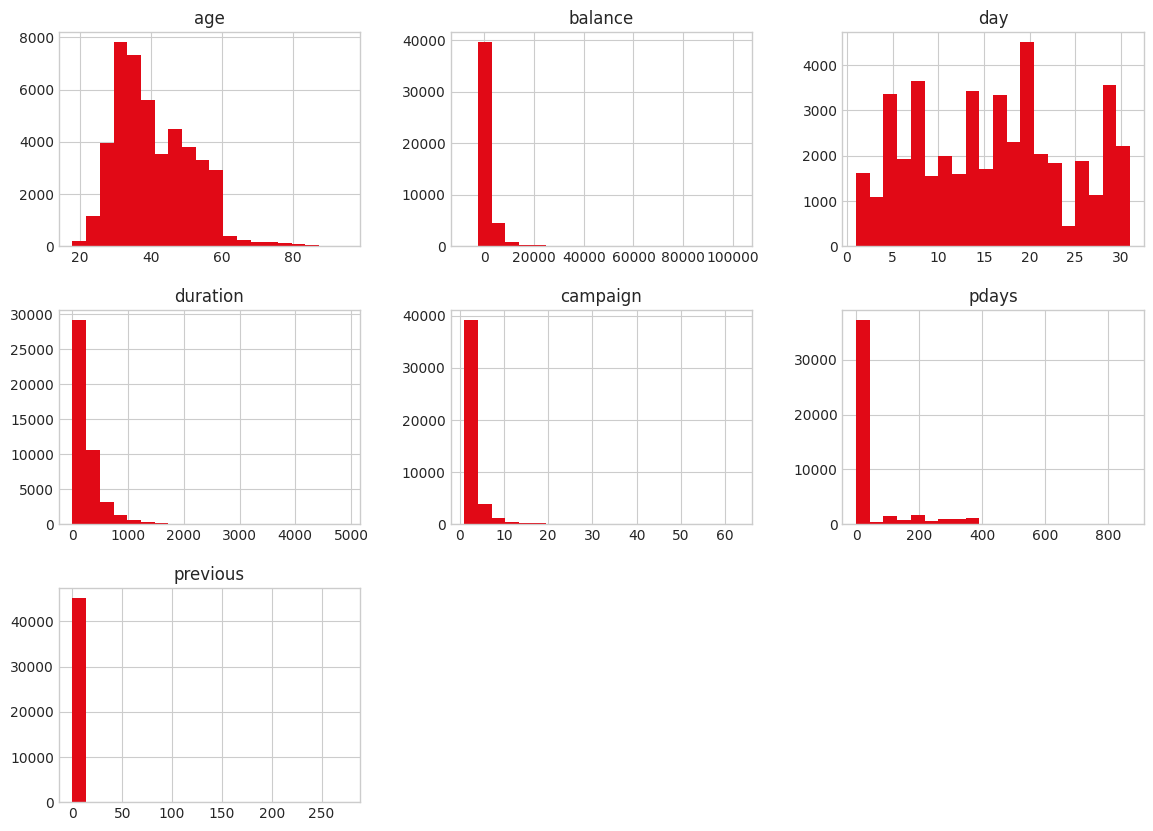

In [11]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(14,10), color='#E10916')
plt.show()

We can see that some numerical columns have outliers (especially 'pdays'). we will analyse outliers later.

Analysis of the response column

<Axes: title={'center': 'Deposit value counts'}, xlabel='y'>

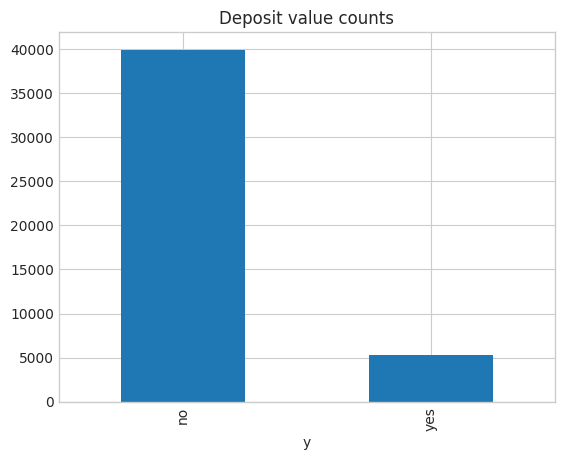

In [12]:
value_counts = df['y'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')

Correlations

Analysis by Occupation:



Number of Occupations: Management is the occupation that is more prevalent in this dataset.



Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.



Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts.

In [20]:
import plotly.express as px

# Filter the DataFrame for subscribers
suscribed_df = df.loc[df["y"] == "yes"]

# Create a box plot for balances by job
fig = px.box(suscribed_df, x='job', y='balance', 
             title='Distribution of Balances by Occupation',
             color='job',  # Automatically assigns different colors for each occupation
             color_discrete_sequence=px.colors.qualitative.Plotly)  # You can choose different color sequences

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Occupation',
    yaxis_title='Balance',
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

fig.show()

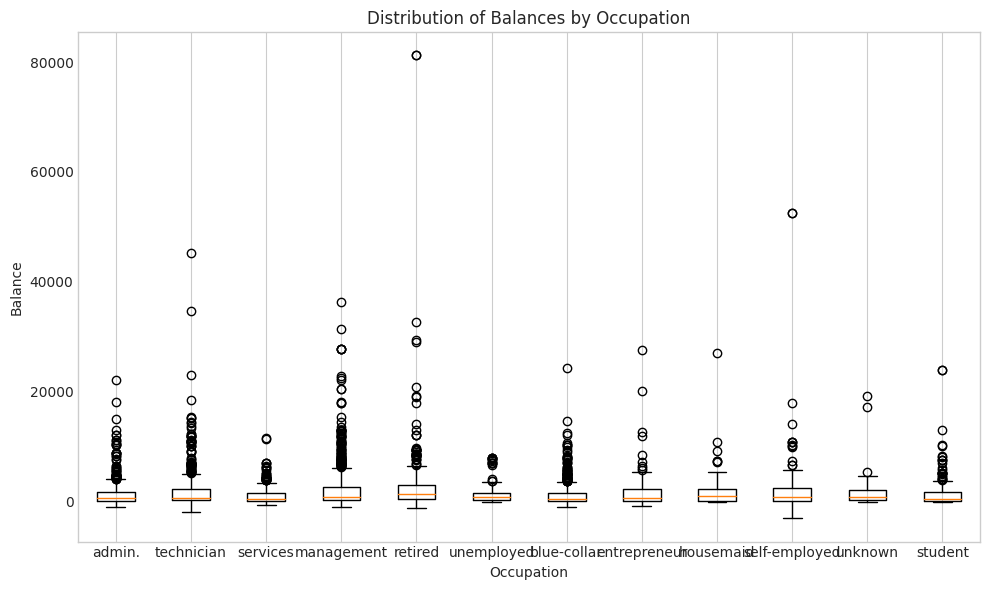

In [18]:
import matplotlib.pyplot as plt

# Filter the DataFrame for subscribed individuals
subscribed_df = df[df["y"] == "yes"]

# Prepare balances grouped by occupations
balances = [subscribed_df[subscribed_df["job"] == job]["balance"].values for job in subscribed_df["job"].unique()]

# Create a box plot for balances
plt.figure(figsize=(10, 6))
plt.boxplot(balances, labels=subscribed_df["job"].unique())
plt.title('Distribution of Balances by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Balance')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

from plotly.subplots import make_subplots

from plotly.offline import iplot





# Define data traces for polar bar plot

trace1 = go.Barpolar(

    r=negative,

    theta=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",

         "services", "student", "technician", "unemployed"],

    name='Negative Balance',

    marker=dict(

        color='rgb(246, 46, 46)'

    )

)

trace2 = go.Barpolar(

    r=low,

    theta=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",

         "services", "student", "technician", "unemployed"],

    name='Low Balance',

    marker=dict(

        color='rgb(246, 97, 46)'

    )

)

trace3 = go.Barpolar(

    r=middle,

    theta=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",

         "services", "student", "technician", "unemployed"],

    name='Middle Balance',

    marker=dict(

        color='rgb(246, 179, 46)'

    )

)

trace4 = go.Barpolar(

    r=high,

    theta=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",

         "services", "student", "technician", "unemployed"],

    name='High Balance',

    marker=dict(

        color='rgb(46, 246, 78)'

    )

)



# Create subplots for polar plots

fig = make_subplots(rows=1, cols=1, subplot_titles=("Balance by Job Occupation"))



# Add traces to subplot

fig.add_trace(trace1)

fig.add_trace(trace2)

fig.add_trace(trace3)

fig.add_trace(trace4)



# Update layout

fig.update_layout(

    title='Mean Balance in Account by Job Occupation',

    polar=dict(

        radialaxis=dict(

            visible=True,

            tickangle=45

        )

    )

)



# Plot figure

iplot(fig, filename='polar-bar-chart')

Marital Status



Well in this analysis we didn't find any significant insights other than most divorced individuals are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population.

In [ ]:
# Distribution of Balances by Marital status

single = df['balance'].loc[df['marital'] == 'single'].values

married = df['balance'].loc[df['marital'] == 'married'].values

divorced = df['balance'].loc[df['marital'] == 'divorced'].values



# Create Histogram traces for each marital status

single_dist = go.Histogram(

    x=single,

    histnorm='density', 

    name='single',

    marker=dict(

        color='#6E6E6E'

    )

)



married_dist = go.Histogram(

    x=married,

    histnorm='density', 

    name='married',

    marker=dict(

        color='#2E9AFE'

    )

)



divorced_dist = go.Histogram(

    x=divorced,

    histnorm='density', 

    name='divorced',

    marker=dict(

        color='#FA5858'

    )

)



# Create subplots

fig = make_subplots(rows=3, cols=1, subplot_titles=("Single", "Married", "Divorced"))



# Add traces to subplots

fig.add_trace(single_dist, row=1, col=1)

fig.add_trace(married_dist, row=2, col=1)

fig.add_trace(divorced_dist, row=3, col=1)



# Update layout

fig.update_layout(

    showlegend=False, 

    title="Price Distributions by Marital Status",

    height=1000, 

    width=800

)



# Plot figure

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [ ]:
# Notice how divorced have a considerably low amount of balance.



fig = ff.create_facet_grid(

    df,

    x='duration',

    y='balance',

    color_name='marital',

    show_boxes=False,

    marker={'size': 10, 'opacity': 1.0},

    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}

)



# Plot figure

iplot(fig, filename='facet-custom-colormap')

Clustering Marital Status and Education:



Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.



Education: The level of education also has a significant impact on the amount of balance a prospect has.



Loans: Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.

In [ ]:
df = df.drop(df.loc[df["education"] == "unknown"].index)

df['education'].unique()

In [ ]:
df['marital/education'] = np.nan

lst = [df]



for col in lst:

    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'

    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'

    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'

    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'

    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'

    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'

    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'

    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'

    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'

    

    

df.head()

In [ ]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()



fig = plt.figure(figsize=(12,8))









sns.barplot(x="balance", y="marital/education", data=education_groups,

            label="Total", palette="RdBu")



plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [ ]:
# Let's see the group who had loans from the marital/education group



loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()





no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values

has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values





labels = loan_balance['marital/education'].unique().tolist()





trace0 = go.Scatter(

    x=no_loan,

    y=labels,

    mode='markers',

    name='No Loan',

    marker=dict(

        color='rgb(175,238,238)',

        line=dict(

            color='rgb(0,139,139)',

            width=1,

        ),

        symbol='circle',

        size=16,

    )

)

trace1 = go.Scatter(

    x=has_loan,

    y=labels,

    mode='markers',

    name='Has a Previous Loan',

    marker=dict(

        color='rgb(250,128,114)',

        line=dict(

            color='rgb(178,34,34)',

            width=1,

        ),

        symbol='circle',

        size=16,

    )

)



data = [trace0, trace1]

layout = go.Layout(

    title="The Impact of Loans to Married/Educational Clusters",

    xaxis=dict(

        showgrid=False,

        showline=True,

        linecolor='rgb(102, 102, 102)',

        titlefont=dict(

            color='rgb(204, 204, 204)'

        ),

        tickfont=dict(

            color='rgb(102, 102, 102)',

        ),

        showticklabels=False,

        dtick=10,

        ticks='outside',

        tickcolor='rgb(102, 102, 102)',

    ),

    margin=dict(

        l=140,

        r=40,

        b=50,

        t=80

    ),

    legend=dict(

        font=dict(

            size=10,

        ),

        yanchor='middle',

        xanchor='right',

    ),

    width=1000,

    height=800,

    paper_bgcolor='rgb(255,250,250)',

    plot_bgcolor='rgb(255,255,255)',

    hovermode='closest',

)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='lowest-oecd-votes-cast')

Campaign Duration:



Campaign Duration: Hmm, we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.



Average Campaign Duration: The average campaign duration is 374.76, let's see if clients that were above this average were more likely to open a term deposit.



Duration Status: People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

In [ ]:
# Let's drop marital/education and balance status

# Let's scale both numeric and categorical values

# Then let's use a correlation matrix

# With that we can determine if duration has influence on term deposits



from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

fig = plt.figure(figsize=(12,8))

df['y'] = LabelEncoder().fit_transform(df['y'])







# Separate both dataframes into 

numeric_df = df.select_dtypes(exclude="object")

# categorical_df = df.select_dtypes(include="object")



corr_numeric = numeric_df.corr()





sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")

plt.title("Correlation Matrix", fontsize=16)

plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_style('whitegrid')

avg_duration = df['duration'].mean()



lst = [df]

df["duration_status"] = np.nan



for col in lst:

    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"

    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"

    

pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)





ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')

plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)

plt.xlabel("Duration Status", fontsize=18);

plt.ylabel("Percentage (%)", fontsize=18)



for p in ax.patches:

    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))

    



plt.show()

Pre Processing:



Outlier Detection

In [ ]:
from collections import Counter

def detect_outliers(data,features):

    outlier_indices = []

    for c in features:

        # 1st quartile

        Q1 = np.percentile(data[c],25)

        # 3rd quartile

        Q3 = np.percentile(data[c],75)

        # IQR

        IQR = Q3 - Q1

        # Outlier step

        outlier_step = IQR * 1.5

        # detect outlier and their indeces

        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index

        # store indeces

        outlier_indices.extend(outlier_list_col)

    

    outlier_indices = Counter(outlier_indices)

    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    

    return multiple_outliers

In [ ]:
outlier_indices = detect_outliers(df,['age','day','duration','campaign','previous'])



# Check the outlier indices and print only the valid ones

print("Valid outlier indices:")

valid_outlier_indices = []

for index in outlier_indices:

    if index < len(df):

        valid_outlier_indices.append(index)

        print(index)

    else:

        print(f"Index {index} is out of bounds.")



# Drop rows with valid outlier indices from the DataFrame

df = df.drop(valid_outlier_indices)



# Print the cleaned DataFrame

print("DataFrame after dropping valid outlier indices:")

print(df)


Missing values

In [ ]:
df.isna().sum()

I do not include the Duration column in the dataset, as it is unknown data at the time of the prediction.

In [ ]:
df=df.drop(['duration'],axis=1)

One-Hot Encoding

In [ ]:
df.info()

In [ ]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']



df = pd.get_dummies(df, columns=columns).mul(1)

df.head()

The pdays data indicates how many times the customer has been contacted before.



Updated as follows:



if the pdays = 0, it indicates that it has not been contacted before



if the pdays = 1, it indicates that it was contacted earlier

In [ ]:
def pdayswork(pdays):

    if(pdays == -1):

        return(0)

    elif(pdays >= 0):

        return(1)

df['pdays2'] = df['pdays'].apply(pdayswork)

our target column, whose data type is object, turned into numerical values. And new target column name is depositNew. Also as this is a classification problem, the target column can remain as an object. But I chose to convert it to int data type.

In [ ]:
def deposit1(y):

    if(y=='yes'):

        return(1)

    elif(y=='no'):

        return(0)

df['deposit'] = df['y'].apply(deposit1)



df=df.drop(['y'],axis=1)


Data Normalization

In [ ]:
df.info()

In [ ]:
df = df.drop(['marital/education'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 0:51]

Y = df.iloc[:, 51]

nd = StandardScaler()

nd.fit(X)

X =nd.transform(X)

print(X)

In [ ]:
Model Building

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import f1_score

X = df.iloc[:, 0:51]

Y = df.iloc[:, 51]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)


In [ ]:
svm_classifier = SVC(random_state=3432, C=0.5)

In [ ]:
svm_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Predicting Test Set

y_pred =svm_classifier.predict(X_test)



acc = accuracy_score(y_test, y_pred)

prec = precision_score(y_test, y_pred)

rec = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)



model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],

               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])



# results = results.append(model_results, ignore_index = True)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=12,random_state=50)



clf.fit(X_train,y_train)



prediction = clf.predict(X_test)



acc = accuracy_score(y_test,prediction)*100

print("Random Forest accuracy:",acc)

# accuracies['Random Forest']=acc



f1=f1_score(y_test,prediction)*100

print("F1-Score: ",f1)

f1scores['Random Forest']=f1

In [ ]:
knn= KNeighborsClassifier(n_neighbors = 4)

knn.fit(X_train, y_train)

prediction=knn.predict(X_test)



acc = accuracy_score(y_test,prediction)*100

print("Knn accuracy:",acc)

accuracies['KNN']=acc



f1=f1_score(y_test,prediction)*100

print("F1-Score: ",f1)

f1scores['KNN']=f1